<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter3/gibbsamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
!python --version

Python 3.7.11


# Example 3.5
## Import modules

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma
print(np.__version__)

1.19.5


## Set random seed

In [110]:
np.random.seed(9)

## Original Program

0.37984
0.6128852884000001


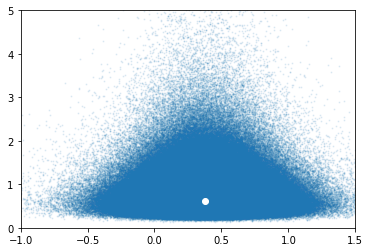

In [111]:
x = np.array([[-0.9472, 0.5401, -0.2166, 1.1890, 1.3170,
               -0.4056, -0.4449, 1.3284, 0.8338, 0.6044]])
n=x.size
sample_mean = np.mean(x)
sample_var = np.var(x)
sig2 = np.var(x)
mu=sample_mean

print(mu)
print(sig2)

N=10**6
gibbs_sample = np.array(np.zeros((N, 2)))
for k in range(N):
    mu=sample_mean + np.sqrt(sig2/n)*np.random.randn()
    V=np.sum((x-mu)**2)/2
    sig2 = 1/np.random.gamma(n/2, 1/V)
    gibbs_sample[k,:]= np.array([mu, sig2])
plt.scatter(gibbs_sample[:,0], gibbs_sample[:,1],alpha =0.1,s =1)
plt.plot(np.mean(x), np.var(x),'wo')
plt.ylim([0,5]), plt.xlim([-1,1.5])
plt.show()

## Just check if the shape is still like normal/gamma distribution

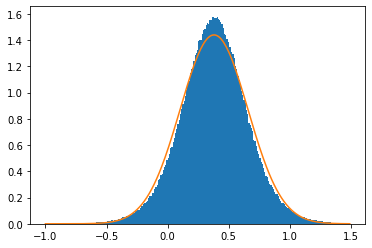

0.3793166988581546
0.2770482073943538


In [112]:
_, bins, _ = plt.hist(gibbs_sample[:,0], density=1, bins = np.arange(-1,1.5,0.01))
mu, sigma = norm.fit(gibbs_sample[:,0])
best_fit_line = norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.show()

print(mu)
print(sigma)

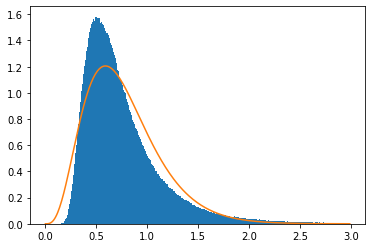

4.334479560854302
0
0.17676984159631254


In [113]:
_, bins, _ = plt.hist(gibbs_sample[:,1], density=1, bins = np.arange(0.0,3.0,0.01))

fit_alpha, fit_loc, fit_beta= gamma.fit(gibbs_sample[:,1],floc=0)
best_fit_line = gamma.pdf(bins, fit_alpha, fit_loc, fit_beta)
plt.plot(bins, best_fit_line)
plt.show()
print(fit_alpha)
print(fit_loc)
print(fit_beta)

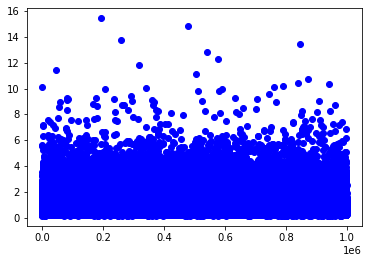

In [120]:
plt.plot(gibbs_sample[1000:,1],'bo')
plt.show()